## Setup

### Imports

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Notebook settings

In [ ]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)

sns.set_theme(style='white', palette='Blues_r')

### Functions

In [ ]:
# Functions 


#plot boxplot
def boxplot_(df, x, y, title, x_label, y_label, color='blue', target_var=False, hue=None, ticks=None, show_leg = False):
    if target_var == True:
        color = 'black'
    plt.subplots(figsize=(10,5))
    sns.boxplot(data=df, x=x, y=y, hue=hue, color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(list(range(len(ticks))),ticks)
    plt.title(title)
    plt.legend().remove()
    plt.show()
    if show_leg == True:
        plt.legend(loc='best')

# plot scatterplot
def scatter_(df, x, y, title, x_label, y_label, color='blue', target_var=False, hue=None, show_leg = False):
    if target_var == True:
        color = 'black'
    plt.show()
    plt.subplots(figsize=(10,5))
    sns.scatterplot(data=df, x=x, y=y, hue=hue)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend().remove()
    if show_leg == True:
        plt.legend(loc='best')

# plot timeseries plot
def timeseries_plot(df, y, ylabel, color='blue', target_var=False, existing_ax=None, label=None):
    if target_var == True:
        color = 'black'
    if existing_ax == None:
        fig, ax = plt.subplots(figsize=(10,5))
    else:
        ax = existing_ax
    if not label:
       label = y.replace("_"," ").title()
    sns.lineplot(df, x=df.index, y=y, color=color, label=label)
    ax.set(title=f"{ylabel} over time", ylabel=ylabel, label=y, xlabel="Date")
    plt.legend(loc='best')

from statsmodels.tsa.stattools import adfuller

# function for adf test
def dickeyFullerTest(df):
    for column in df.columns:
        result = adfuller(df[column])
        # print(f"Column: {column}, ADF statistic: {result[0]}, p-value: {result[1]}")
        # for key, value in result[4].items():
        #     print(f"Critical value ({key}): {value}")
        if (result[1] < 0.05) &  (result[4]['1%'] > result[0]):
            print(f'{column} is stationary')
        else:
            print(f'{column} is not stationary')




from mpl_toolkits.axes_grid1 import host_subplot

# plot duel times series
def plot_dual_axis_timeseries(df, y1, y2, ylabel1, ylabel2, color1='blue', color2='black'):
    fig, axi = plt.subplots(figsize=(10,5))
    ax = host_subplot(111) # subplot(nrows, ncols, plot_number)
    ax0 = ax.twinx()
    ax1 = sns.lineplot(data=df, x=df.index, y=y1, ax=ax, color=color1, label=ylabel1, legend=False)
    ax2 = sns.lineplot(data=df, x=df.index, y=y2, ax=ax0, color=color2, label=ylabel2, legend=False)
    axi.set(xticks=[], yticks=[])
    ax1.set(ylabel=ylabel1, title=f"{ylabel1} and {ylabel2} over time")
    ax0.set(ylabel=ylabel2)
    ax.legend()
    ax.yaxis.get_label()
    ax.yaxis.get_label()


# annotate and vertical line
def annotate_and_line(x=None, y=None, color="red", linestyle="--", annotation=None, vertical_line=False, time_series=False, annot_x=None):    
    if time_series:
        x=pd.to_datetime(x)
        annot_x = pd.to_datetime(annot_x)
    if vertical_line:    
        plt.axvline(x, color=color, linestyle=linestyle)
    if annot_x:
        x = annot_x
    if annotation:
        plt.annotate(annotation, xy=(x, y), color=color)


# Corr bar plot
def corr_bar(df, title, y_label, group, var_comp):
    data = df.corr()[var_comp]
    plt.figure(figsize=(10,5))
    data[group].sort_values().plot(kind='bar', color='blue')
    plt.title(title)
    plt.ylabel(y_label)
    plt.show()


# Histogram and boxplot (and skew output) CLO
def den_hist_boxplot(data, features, bins, target_var=False, color='blue'):
    for col in features:
        if target_var == True:
            color = 'black'
        print(f'{col} skew: {round(data[col].skew(), 2)}')
        plt.figure(figsize = (15,5))
        plt.subplot(1, 2, 1)
        sns.histplot(data = data, features=data[col], bins=bins, stat='density', kde=True, color=color)
        plt.xticks(rotation=90)
        plt.ticklabel_format(style='plain')
        plt.title(f'Density Histogram of {col}')
        plt.subplot(1, 2, 2)
        sns.boxplot(data = data, x=data[col], color=color)
        plt.title(f'Boxplot of {col}')
        plt.xticks(rotation=90)


# Histogram JM
def histogram_plot(df, x, xlabel, bin_edges, stat='density', kde=True, color='blue', target_var=False, xrange=None, yrange=None):
    if target_var == True:
        color = 'black'
    fig, ax = plt.subplots(figsize = (10, 5))
    sns.histplot(data=df, x=x, stat=stat, kde=kde, bins=bin_edges, color=color),
    ax.set(title=f'{xlabel} Overall Distribution', xlabel=xlabel, xlim=xrange, ylim=yrange);

# Multiple annotation on a graph with arrow
def annotate_graph (text, xdate, y, xtext, ytext):
    plt.annotate(text, xy =((pd.to_datetime(xdate)), y), xytext =(pd.to_datetime(xtext), ytext),  
                arrowprops = dict(facecolor = 'blue', shrink = 0.05, headwidth = 7, headlength = 7),
                fontsize= 8)

# Correlation heatmap
def correlation_heat_map(df, title, method="pearson", vmin=-1, vmax=1):
    col_names = [col.replace("_", " ") for col in df.columns]
    ax = sns.heatmap(df.corr(method=method), annot=True, fmt=".2f", xticklabels=col_names, yticklabels=col_names, cmap="coolwarm", vmin=vmin, vmax=vmax)
    ax.set(title=title)
    
# Use for modeling with target 
def check_if_surplus(df, i, col, remaining_scans):
    if df.loc[i+1,col] > remaining_scans:
        return True, (df.loc[i+1,col] - remaining_scans)
    else:
        return False, (remaining_scans - df.loc[i+1,col])

### Reading in data

In [ ]:
df = pd.read_csv('../05.output/actual/actual.csv')
df['week'] = pd.to_datetime(df['week'])
df['week'].dtype
df.set_index('week', inplace=True)

## Improving the model

In [ ]:
using_real_data = True

df_model = df[['capacity','waiting_list', 'breaches', 'scans_done', 'new_demand',]].reset_index().copy()
model_columns = []
for i in range(1,7):
    df_model[f'model_{i}_weeks'] = ''
    model_columns.append(f'model_{i}_weeks')
first_model = [round((df_model.loc[0,'waiting_list']-df_model.loc[0,'breaches'])/6,1)]*6
df_model.loc[0,model_columns[0]:model_columns[-1]] = first_model
df_model.loc[0, 'model_breaches'] = df_model.loc[0, 'breaches']
for i in range((len(df_model)-1)):
    for j in range(5):
        df_model.loc[i+1,model_columns[j+1]] = df_model.loc[i,model_columns[j]]
    df_model.loc[i+1,'model_breaches'] = df_model.loc[i,'model_breaches'] + df_model.loc[i,'model_6_weeks']
    df_model.loc[i+1,model_columns[0]] = df_model.loc[i,'new_demand']
    if using_real_data:
        remaining_scans = df_model.loc[i,'scans_done']
    else:
        remaining_scans = df_model.loc[i,'capacity']
    can_continue, remaining_scans = check_if_surplus(df_model, i, 'model_breaches', remaining_scans)
    if can_continue:
        df_model.loc[i+1,'model_breaches'] = remaining_scans
    else:
        df_model.loc[i+1,'model_breaches'] = 0
        can_continue, remaining_scans = check_if_surplus(df_model, i, 'model_6_weeks', remaining_scans)
        if can_continue:
            df_model.loc[i+1,'model_6_weeks'] = remaining_scans
        else:
            df_model.loc[i+1,'model_6_weeks'] = 0
            can_continue, remaining_scans = check_if_surplus(df_model, i, 'model_5_weeks', remaining_scans)
            if can_continue:
                df_model.loc[i+1,'model_5_weeks'] = remaining_scans
            else:
                df_model.loc[i+1,'model_5_weeks'] = 0
                can_continue, remaining_scans = check_if_surplus(df_model, i, 'model_4_weeks', remaining_scans)
                if can_continue:
                    df_model.loc[i+1,'model_4_weeks'] = remaining_scans
                else:
                    df_model.loc[i+1,'model_4_weeks'] = 0
                    can_continue, remaining_scans = check_if_surplus(df_model, i, 'model_3_weeks', remaining_scans)
                    if can_continue:
                        df_model.loc[i+1,'model_3_weeks'] = remaining_scans
                    else:
                        df_model.loc[i+1,'model_3_weeks'] = 0
                        can_continue, remaining_scans = check_if_surplus(df_model, i, 'model_2_weeks', remaining_scans)
                        if can_continue:
                            df_model.loc[i+1,'model_2_weeks'] = remaining_scans
                        else:
                            df_model.loc[i+1,'model_2_weeks'] = 0
                            can_continue, remaining_scans = check_if_surplus(df_model, i, 'model_1_weeks', remaining_scans)
                            if can_continue:
                                df_model.loc[i+1,'model_1_weeks'] = remaining_scans
                            else:
                                df_model.loc[i+1,'model_1_weeks'] = 0
    df_model.loc[i,'model_waiting_list'] = df_model.loc[i,(model_columns+['model_breaches'])].sum()
df_model['scans_done'].sum(), df_model['capacity'].sum()
df_model

,week,capacity,waiting_list,breaches,scans_done,new_demand,model_1_weeks,model_2_weeks,model_3_weeks,model_4_weeks,model_5_weeks,model_6_weeks,model_breaches,model_waiting_list
0,2022-04-03,1394,5802.5,1257.3,1372.8,1403.6,757.5,757.5,757.5,757.5,757.5,757.5,1257.3,5802.3
1,2022-04-10,1394,5833.3,1251.8,1831.5,1416.8,1403.6,757.5,757.5,757.5,757.5,757.5,642.0,5833.1
2,2022-04-17,1394,5418.6,1239.7,1430.0,1117.6,1416.8,1403.6,757.5,757.5,757.5,325.5,0.0,5418.4
3,2022-04-24,1394,5106.2,1218.8,1141.8,1028.5,1117.6,1416.8,1403.6,757.5,410.5,0,0.0,5106.0
4,2022-05-01,1394,4992.9,1147.3,1295.8,1173.7,1028.5,1117.6,1416.8,1403.6,26.2,0,0.0,4992.7
5,2022-05-08,1394,4870.8,1105.5,987.8,1076.9,1173.7,1028.5,1117.6,1416.8,134.0,0,0.0,4870.6
6,2022-05-15,1394,4959.9,1058.2,1620.3,1405.8,1076.9,1173.7,1028.5,1117.6,563.0,0,0.0,4959.7
7,2022-05-22,1394,4745.4,940.5,1540.0,1344.2,1405.8,1076.9,1173.7,1028.5,60.3,0,0.0,4745.2
8,2022-05-29,1394,4549.6,805.2,1772.1,1376.1,1344.2,1405.8,1076.9,722.5,0,0,0.0,4549.4
9,2022-06-05,1394,4153.6,617.1,930.6,889.9,1376.1,1344.2,1405.8,27.3,0,0,0.0,4153.4


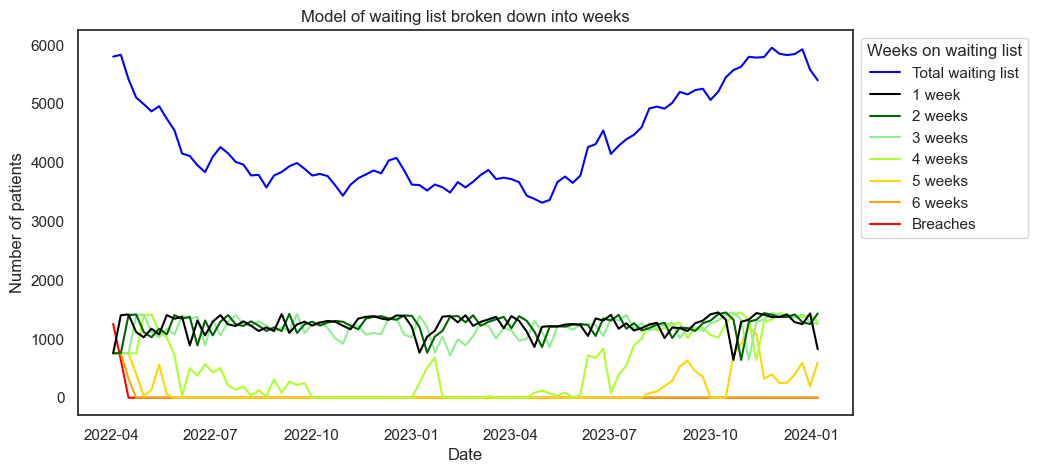

In [ ]:
df_model_w_index = df_model.set_index('week', drop=True).copy()
fig, ax = plt.subplots(figsize=(10,5))
timeseries_plot(df_model_w_index[:-1], 'model_breaches', 'Breaches', existing_ax=ax, color='red', label='Breaches')
timeseries_plot(df_model_w_index[:-1], 'model_6_weeks', '6 weeks', existing_ax=ax, color='orange', label='6 weeks')
timeseries_plot(df_model_w_index[:-1], 'model_5_weeks', '5 weeks', existing_ax=ax, color='gold', label='5 weeks')
timeseries_plot(df_model_w_index[:-1], 'model_4_weeks', '4 weeks', existing_ax=ax, color='greenyellow', label='4 weeks')
timeseries_plot(df_model_w_index[:-1], 'model_3_weeks', '3 weeks', existing_ax=ax, color='lightgreen', label='3 weeks')
timeseries_plot(df_model_w_index[:-1], 'model_2_weeks', '2 weeks', existing_ax=ax, color='darkgreen', label='2 weeks')
timeseries_plot(df_model_w_index[:-1], 'model_1_weeks', '1 weeks', existing_ax=ax, color='black', label='1 week')
timeseries_plot(df_model_w_index[:-1], 'model_waiting_list', 'Model Waiting List', existing_ax=ax, color='blue', label='Total waiting list')
ax.set(title='Model of waiting list broken down into weeks', ylabel='Number of patients')
plt.legend(title='Weeks on waiting list', reverse=True, bbox_to_anchor=(1, 1))

In [ ]:
using_real_data = False

df_model = df[['capacity','waiting_list', 'breaches', 'scans_done', 'new_demand',]].reset_index().copy()
model_columns = []
for i in range(1,7):
    df_model[f'model_{i}_weeks'] = ''
    model_columns.append(f'model_{i}_weeks')
first_model = [round((df_model.loc[0,'waiting_list']-df_model.loc[0,'breaches'])/6,1)]*6
df_model.loc[0,model_columns[0]:model_columns[-1]] = first_model
df_model.loc[0, 'model_breaches'] = df_model.loc[0, 'breaches']
for i in range((len(df_model)-1)):
    for j in range(5):
        df_model.loc[i+1,model_columns[j+1]] = df_model.loc[i,model_columns[j]]
    df_model.loc[i+1,'model_breaches'] = df_model.loc[i,'model_breaches'] + df_model.loc[i,'model_6_weeks']
    df_model.loc[i+1,model_columns[0]] = df_model.loc[i,'new_demand']
    if using_real_data:
        remaining_scans = df_model.loc[i,'scans_done']
    else:
        remaining_scans = df_model.loc[i,'capacity']
    can_continue, remaining_scans = check_if_surplus(df_model, i, 'model_breaches', remaining_scans)
    if can_continue:
        df_model.loc[i+1,'model_breaches'] = remaining_scans
    else:
        df_model.loc[i+1,'model_breaches'] = 0
        can_continue, remaining_scans = check_if_surplus(df_model, i, 'model_6_weeks', remaining_scans)
        if can_continue:
            df_model.loc[i+1,'model_6_weeks'] = remaining_scans
        else:
            df_model.loc[i+1,'model_6_weeks'] = 0
            can_continue, remaining_scans = check_if_surplus(df_model, i, 'model_5_weeks', remaining_scans)
            if can_continue:
                df_model.loc[i+1,'model_5_weeks'] = remaining_scans
            else:
                df_model.loc[i+1,'model_5_weeks'] = 0
                can_continue, remaining_scans = check_if_surplus(df_model, i, 'model_4_weeks', remaining_scans)
                if can_continue:
                    df_model.loc[i+1,'model_4_weeks'] = remaining_scans
                else:
                    df_model.loc[i+1,'model_4_weeks'] = 0
                    can_continue, remaining_scans = check_if_surplus(df_model, i, 'model_3_weeks', remaining_scans)
                    if can_continue:
                        df_model.loc[i+1,'model_3_weeks'] = remaining_scans
                    else:
                        df_model.loc[i+1,'model_3_weeks'] = 0
                        can_continue, remaining_scans = check_if_surplus(df_model, i, 'model_2_weeks', remaining_scans)
                        if can_continue:
                            df_model.loc[i+1,'model_2_weeks'] = remaining_scans
                        else:
                            df_model.loc[i+1,'model_2_weeks'] = 0
                            can_continue, remaining_scans = check_if_surplus(df_model, i, 'model_1_weeks', remaining_scans)
                            if can_continue:
                                df_model.loc[i+1,'model_1_weeks'] = remaining_scans
                            else:
                                df_model.loc[i+1,'model_1_weeks'] = 0
    df_model.loc[i,'model_waiting_list'] = df_model.loc[i,(model_columns+['model_breaches'])].sum()
df_model['capacity'].sum() - df_model['scans_done'].sum()

1309.8074468085108

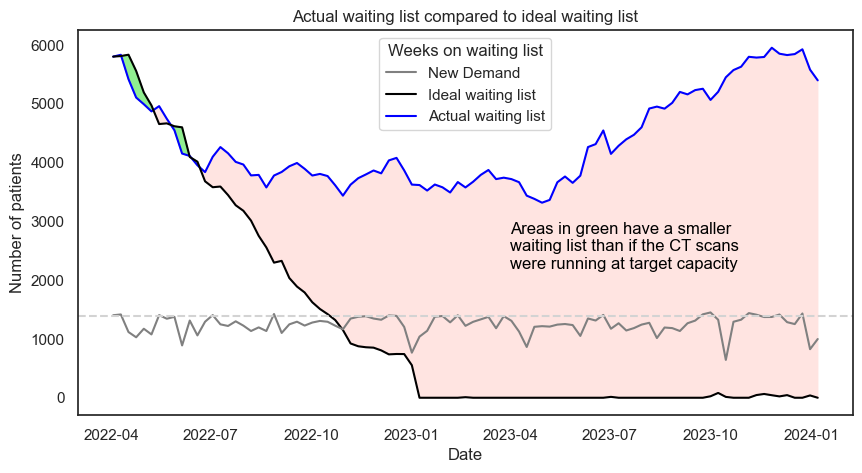

In [ ]:
# Compare waiting lists if target had been met
df_model_w_index = df_model.set_index('week', drop=True).copy()
fig, ax = plt.subplots(figsize=(10,5))
df_model_w_index['below_target'] = np.where(df_model_w_index['model_waiting_list']<df_model_w_index['waiting_list'], 'Y', 'N')
timeseries_plot(df_model_w_index[:-1], 'waiting_list', 'Waiting List', existing_ax=ax, color='blue', label='Actual waiting list')
timeseries_plot(df_model_w_index[:-1], 'model_waiting_list', 'Waiting List', existing_ax=ax, color='black', label='Ideal waiting list')
timeseries_plot(df_model_w_index[:-1], 'new_demand', 'Waiting List', existing_ax=ax, color='grey')
plt.fill_between(df.index, df_model_w_index['model_waiting_list'], df_model_w_index['waiting_list'], color='lightgreen', where=(df_model_w_index['below_target']=='N'), interpolate=True)
plt.fill_between(df.index, df_model_w_index['model_waiting_list'], df_model_w_index['waiting_list'], color='mistyrose', where=(df_model_w_index['below_target']=='Y'), interpolate=True)
annotate_and_line('2023-04-01', 2200, color='black', annotation='Areas in green have a smaller \nwaiting list than if the CT scans \nwere running at target capacity')
ax.set(title='Actual waiting list compared to ideal waiting list', ylabel='Number of patients')
plt.legend(title='Weeks on waiting list', reverse=True, loc='upper center')
plt.axhline(1394, linestyle='--', color='lightgrey')